# Análisis de ventas - Chipotle

El Chipotle es un chile jalapeño maduro que ha sido secado y ahumado, en otros paises el Chipotle son los Pimientos con sabor ahumado con un dulzor suave

Este notebook realiza un análisis exploratorio de un dataset real de ventas en Chipotle.

Incluye:
- Limpieza de datos
- Análisis de ingredientes
- Visualizaciones
- Ejercicios prácticos al final

In [50]:
# Cargar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

## 1. Carga del archivo chipotle.tsv

###Pandas no tiene una función read_tsv().
Solución correcta:

Use read_csv() con el parámetro sep='\t', que es lo que distingue un archivo TSV (Tab Separated Values):

ventas = pd.read_csv('/content/chipotle.tsv', sep='\t')


Explicación breve:
    
    • read_csv() es una función genérica para leer archivos delimitados.
   
    • sep='\t' le dice a pandas que las columnas están separadas por tabulaciones (TSV).


In [51]:
# Cargar el archivo
ventas = pd.read_csv('chipotle.tsv', sep='\t')
ventas.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [52]:
ventas

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [53]:
#Estructura general del dataset
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [54]:
#Buscar valores nulos
ventas.isnull().sum()

,0
order_id,0
quantity,0
item_name,0
choice_description,1246
item_price,0


In [55]:
#Ver las columnas únicas y su tipo
ventas.dtypes

,0
order_id,int64
quantity,int64
item_name,object
choice_description,object
item_price,object


## 2. Limpieza de columnas

In [56]:
# Limpiar la columna de precios, convierte la columna en float, elimina los NAN
ventas['item_price'] = ventas['item_price'].replace('[\$,]', '', regex=True).astype(float)

# Limpiar y convertir choice_description en listas
ventas['ingredientes'] = ventas['choice_description'].dropna().apply(
    lambda x: x.replace('[', '').replace(']', '').split(', ')
)

In [57]:
#Estadísticas rápidas (sólo columnas numéricas)
ventas.describe()


,order_id,quantity,item_price
count,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336
std,528.890796,0.410186,4.245557
min,1.000000,1.000000,1.090000
25%,477.250000,1.000000,3.390000
50%,926.000000,1.000000,8.750000
75%,1393.000000,1.000000,9.250000
max,1834.000000,15.000000,44.250000


In [58]:
ventas

,order_id,quantity,item_name,choice_description,item_price,ingredientes
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,NaN
1,1,1,Izze,[Clementine],3.39,[Clementine]
2,1,1,Nantucket Nectar,[Apple],3.39,[Apple]
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,NaN
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,"[Tomatillo-Red Chili Salsa (Hot), Black Beans,..."
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,"[Fresh Tomato Salsa, Rice, Black Beans, Sour C..."
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,"[Fresh Tomato Salsa, Rice, Sour Cream, Cheese,..."
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,"[Fresh Tomato Salsa, Fajita Vegetables, Pinto ..."
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,"[Fresh Tomato Salsa, Fajita Vegetables, Lettuce]"


In [59]:
#Elimina la columna choice_description ya normalizada
ventas = ventas.drop(['choice_description'], axis=1)
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      4622 non-null   int64  
 1   quantity      4622 non-null   int64  
 2   item_name     4622 non-null   object 
 3   item_price    4622 non-null   float64
 4   ingredientes  3376 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


## 3. Ingredientes más comunes

<ipython-input-60-3415643803>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_ingredientes.values, y=conteo_ingredientes.index, palette='viridis')


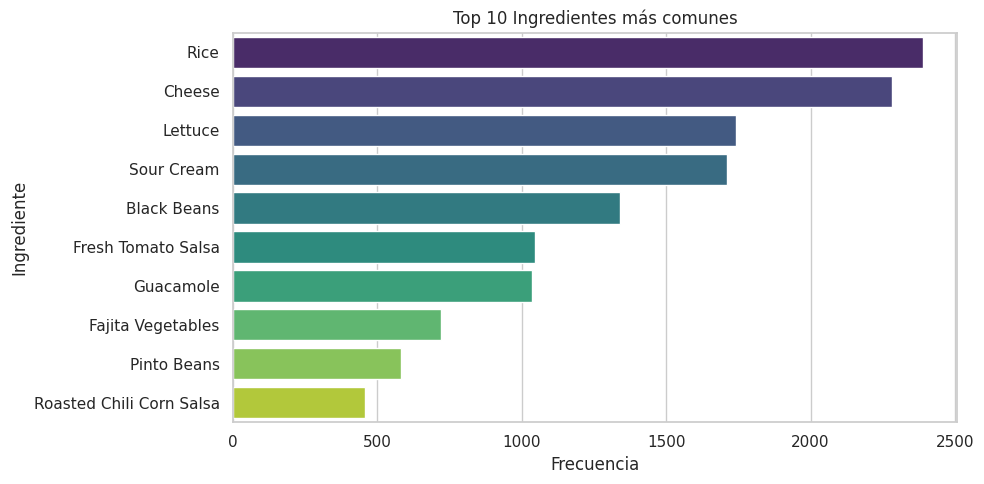

In [60]:
# Explode de ingredientes, elimina los NAN, Explode: convierte las listas en filas
ingredientes_explotados = ventas[['order_id', 'ingredientes']].explode('ingredientes').dropna()

# Conteo
conteo_ingredientes = ingredientes_explotados['ingredientes'].value_counts().head(10)

# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x=conteo_ingredientes.values, y=conteo_ingredientes.index, palette='viridis')
plt.title('Top 10 Ingredientes más comunes')
plt.xlabel('Frecuencia')
plt.ylabel('Ingrediente')
plt.tight_layout()
plt.show()

## 4. Productos más vendidos

<ipython-input-61-2492560404>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_productos.values, y=top_productos.index, palette='magma')


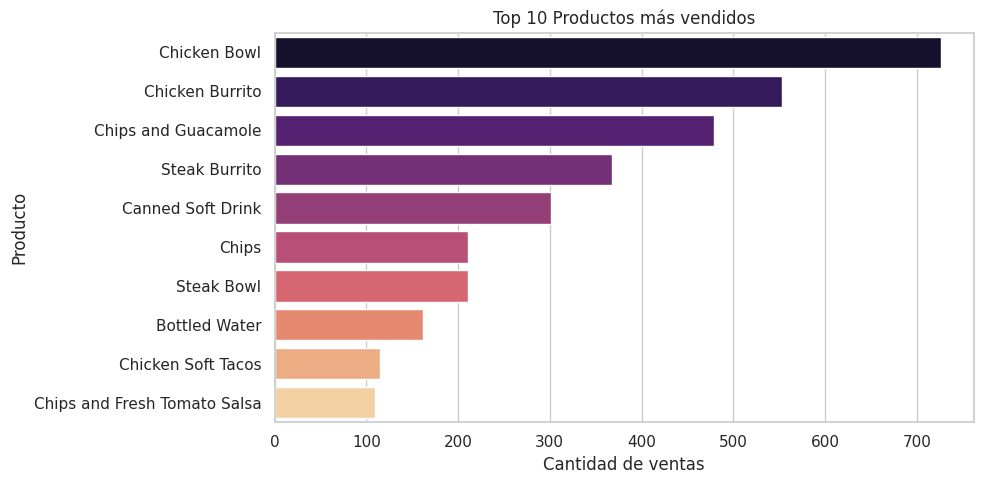

In [61]:
# Top productos
top_productos = ventas['item_name'].value_counts().head(10)

# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x=top_productos.values, y=top_productos.index, palette='magma')
plt.title('Top 10 Productos más vendidos')
plt.xlabel('Cantidad de ventas')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

## 5. Precio promedio por producto

<ipython-input-62-1030159998>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=precio_promedio.values, y=precio_promedio.index, palette='coolwarm')


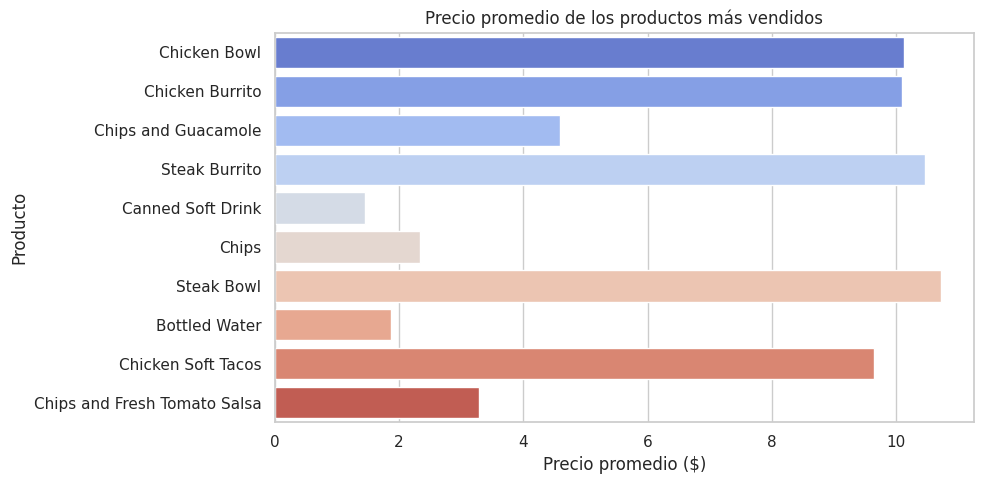

In [62]:
precio_promedio = ventas.groupby('item_name')['item_price'].mean().loc[top_productos.index]

# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x=precio_promedio.values, y=precio_promedio.index, palette='coolwarm')
plt.title('Precio promedio de los productos más vendidos')
plt.xlabel('Precio promedio ($)')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

## 6. Ejercicios propuestos

1. ¿Cuál es el precio total generado por cada producto (`item_name`)?
2. ¿Qué producto genera más ingresos en total?
3. ¿Cuál es el número total de órdenes únicas?
4. ¿Cuántos ingredientes distintos hay en total?
5. **Bonus:** Graficar la distribución del precio total por orden (usando `groupby` + `sum`).

Intentá resolverlos usando `groupby`, `sum`, `nunique`, `value_counts`, y `plot()`.

### Ejercicio 1: Precio total por producto

In [63]:
# Precio total generado por cada producto
total_por_producto = ventas.groupby('item_name')['item_price'].sum().sort_values(ascending=False)
total_por_producto.head(10)

,item_price
item_name,
Chicken Bowl,7342.73
Chicken Burrito,5575.82
Steak Burrito,3851.43
Steak Bowl,2260.19
Chips and Guacamole,2201.04
Chicken Salad Bowl,1228.75
Chicken Soft Tacos,1108.09
Veggie Burrito,934.77
Barbacoa Burrito,894.75


### Ejercicio 2: Producto que más ingresos genera

In [64]:
# Producto que más ingresos genera
producto_top = total_por_producto.idxmax()
ingreso_top = total_por_producto.max()
print(f"El producto que más ingresos genera es '{producto_top}' con un total de ${ingreso_top:.2f}")

El producto que más ingresos genera es 'Chicken Bowl' con un total de $7342.73


### Ejercicio 3: Número total de órdenes únicas

In [65]:
# Número total de órdenes únicas
ordenes_unicas = ventas['order_id'].nunique()
print(f"Hay un total de {ordenes_unicas} órdenes únicas.")

Hay un total de 1834 órdenes únicas.


### Ejercicio 4: Ingredientes distintos en total

In [66]:
# Ingredientes únicos
ingredientes_unicos = ingredientes_explotados['ingredientes'].nunique()
print(f"Hay un total de {ingredientes_unicos} ingredientes distintos.")

Hay un total de 46 ingredientes distintos.


### Ejercicio Bonus: Distribución del precio total por orden

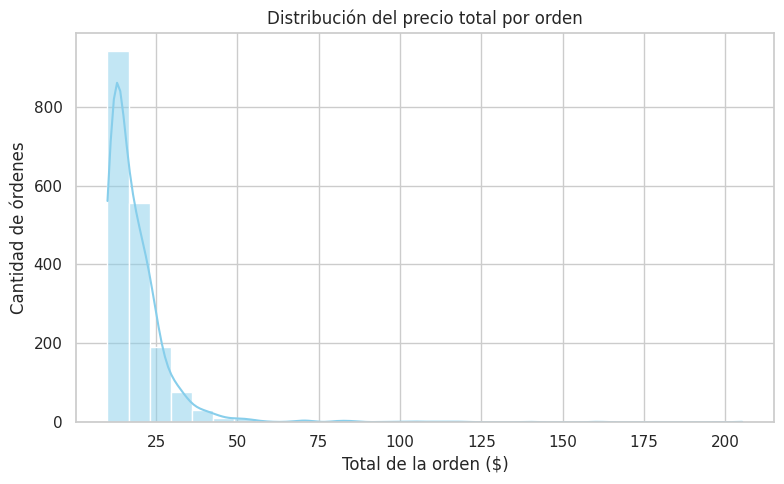

In [67]:
# Precio total por orden
precio_por_orden = ventas.groupby('order_id')['item_price'].sum()

# Histograma
plt.figure(figsize=(8, 5))
sns.histplot(precio_por_orden, bins=30, color='skyblue', kde=True)
plt.title('Distribución del precio total por orden')
plt.xlabel('Total de la orden ($)')
plt.ylabel('Cantidad de órdenes')
plt.tight_layout()
plt.show()

### Bonus Extra: Ingresos totales por producto (visual)

<ipython-input-68-2676138443>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ingresos.values, y=top_ingresos.index, palette='cividis')


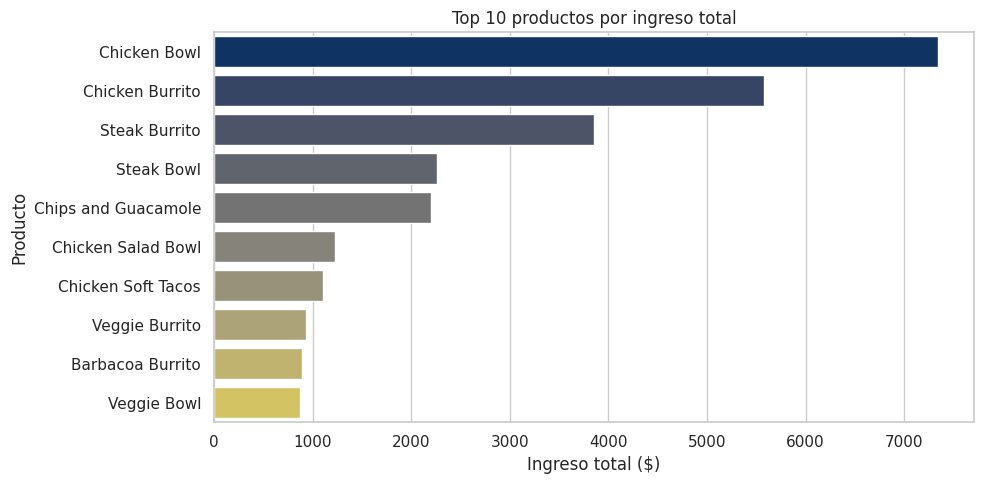

In [68]:
# Top ingresos por producto
top_ingresos = total_por_producto.head(10)

# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x=top_ingresos.values, y=top_ingresos.index, palette='cividis')
plt.title('Top 10 productos por ingreso total')
plt.xlabel('Ingreso total ($)')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()